<a href="https://colab.research.google.com/github/Yaqoob-hassan/kmeans-clustering-model/blob/main/MLKMeans3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data , columns = wine.feature_names)
#print(df.head())

In [5]:
#df.isnull().sum()

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
#print(scaled_data)

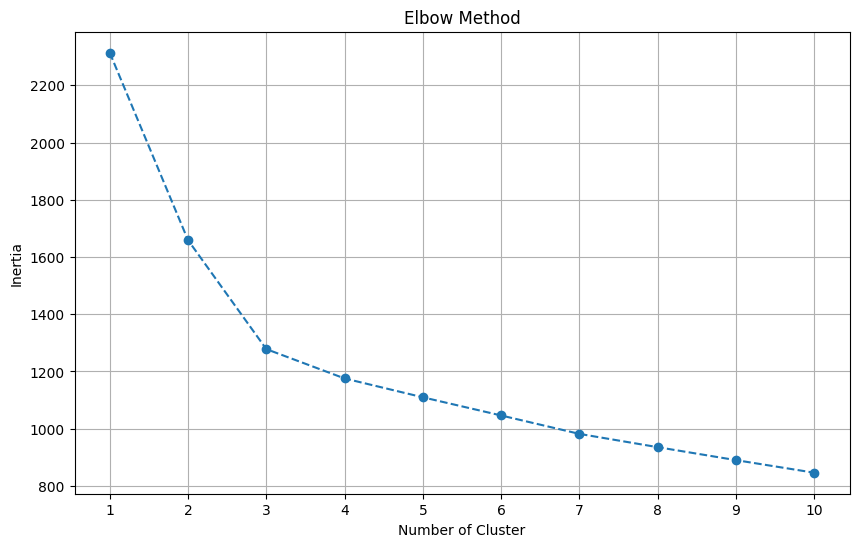

In [12]:
inertia = []
k_means = range(1 , 11)
for k in k_means:
  kmeans = KMeans(n_clusters = k ,random_state= 42 , n_init = 10)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)
plt.figure(figsize = (10 ,6))
plt.plot(k_means ,inertia , marker = 'o' ,linestyle = '--')
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_means)
plt.show()



In [19]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k ,random_state= 42 , n_init = 10)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters

          PC1       PC2  cluster
0    3.316751  1.443463        2
1    2.209465 -0.333393        2
2    2.516740  1.031151        2
3    3.757066  2.756372        2
4    1.008908  0.869831        2
..        ...       ...      ...
173 -3.370524  2.216289        1
174 -2.601956  1.757229        1
175 -2.677839  2.760899        1
176 -2.387017  2.297347        1
177 -3.208758  2.768920        1

[178 rows x 3 columns]


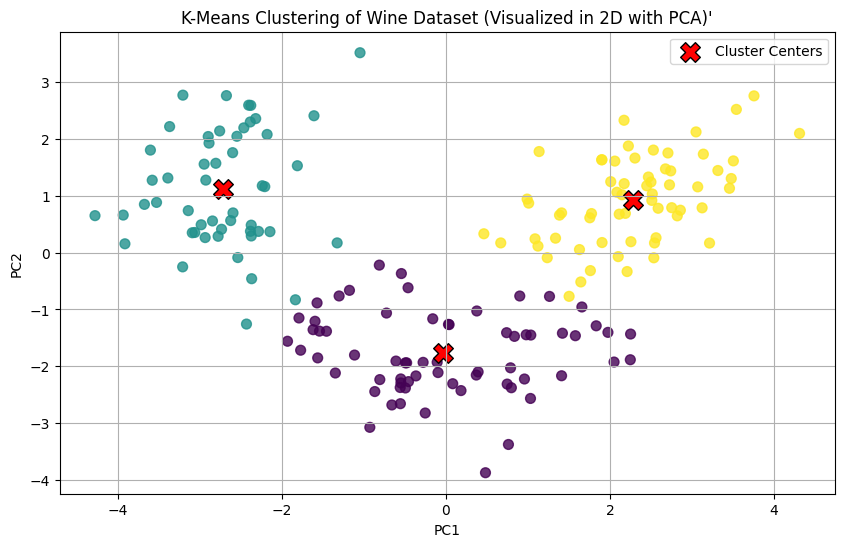

In [28]:
pca = PCA(n_components= 2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result , columns = ['PC1' ,'PC2'])
pca_df['cluster'] = clusters
print(pca_df)

plt.figure(figsize = ( 10 , 6 ))
scatter = plt.scatter(pca_df['PC1'] ,pca_df['PC2'], cmap = 'viridis' ,c= pca_df['cluster'] , s = 50  ,alpha = 0.8)
plt.title("K-Means Clustering of Wine Dataset (Visualized in 2D with PCA)'")
plt.xlabel("PC1")
plt.ylabel('PC2')
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Cluster Centers', edgecolor='black')
plt.legend()
plt.grid(True)
plt.show()



In [29]:

df['Cluster'] = clusters

cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
Cluster                                                                         
0               2.973077  1.062708                      2.803385   510.16923

In [30]:
# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# See the size of each cluster
print("\nNumber of data points in each cluster:")
print(df['Cluster'].value_counts().sort_index())

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
Cluster                                                                         
0               2.973077  1.062708                      2.803385   510.16923